<a href="https://colab.research.google.com/github/CatalystM47/Deep_Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1. Data preparation

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

from torchvision.datasets import MNIST
import torchvision.transforms as transforms

In [2]:
mnist_train = MNIST('./', train=True, transform = transforms.ToTensor(), download = True)
mnist_test = MNIST('./', train=False, transform = transforms.ToTensor(), download = True)

In [3]:
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=256, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=256, shuffle=False)

### 2. Constructing a neural network

In [4]:
class Encoder(nn.Module):
    def __init__(self):
        super(Encoder, self).__init__()
        self.fc1 = nn.Linear(784, 500)
        self.fc2 = nn.Linear(500, 300)
        self.fc3 = nn.Linear(300, 2)
        self.relu = nn.ReLU()

    def forward(self, x): # x : B x 1 x 28 x 28 -> B x 784
        out = x.view(-1, 784)
        out = self.relu(self.fc1(out))
        out = self.relu(self.fc2(out))
        out = self.fc3(out)

        return out

In [5]:
class Decoder(nn.Module):
    def __init__(self):
        super(Decoder, self).__init__()
        self.fc1 = nn.Linear(2, 300)
        self.fc2 = nn.Linear(300, 500)
        self.fc3 = nn.Linear(500, 784)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x): # x : B x 2
        out = self.relu(self.fc1(x))
        out = self.relu(self.fc2(out))
        out = self.fc3(out) # out : B x 784 -> B x 1 x 28 x 28
        out = self.sigmoid(out)
        out = out.view(-1, 1, 28, 28)

        return out

In [6]:
device = torch.device("cuda:0")
encoder = Encoder().to(device)
decoder = Decoder().to(device)

### 3. Loss function and optimization method

In [7]:
parameters = list(encoder.parameters()) + list(decoder.parameters())

loss_func = nn.MSELoss()
optimizer = torch.optim.Adam(parameters, lr=0.001)

### 4. Training the neural network

In [8]:
for epoch in range(20):
    loss_val = 0
    for itr, data in enumerate(train_loader):
        optimizer.zero_grad()

        image, label = data
        image = image.to(device)

        output = encoder(image)
        output = decoder(output)

        loss = loss_func(output, image)
        loss.backward()
        optimizer.step()

        loss_val += loss.item()

    print("Epoch:", epoch+1, "  , Loss:", loss_val)

Epoch: 1   , Loss: 14.65290330350399
Epoch: 2   , Loss: 11.028704795986414
Epoch: 3   , Loss: 10.24109261110425
Epoch: 4   , Loss: 9.79419357329607
Epoch: 5   , Loss: 9.52518805116415
Epoch: 6   , Loss: 9.321895077824593
Epoch: 7   , Loss: 9.168459095060825
Epoch: 8   , Loss: 9.075794480741024
Epoch: 9   , Loss: 8.970558628439903
Epoch: 10   , Loss: 8.858414482325315
Epoch: 11   , Loss: 8.800855439156294
Epoch: 12   , Loss: 8.734104461967945
Epoch: 13   , Loss: 8.670351352542639
Epoch: 14   , Loss: 8.631221372634172
Epoch: 15   , Loss: 8.59399951249361
Epoch: 16   , Loss: 8.525191556662321
Epoch: 17   , Loss: 8.490202456712723
Epoch: 18   , Loss: 8.462747048586607
Epoch: 19   , Loss: 8.411289621144533
Epoch: 20   , Loss: 8.356858786195517


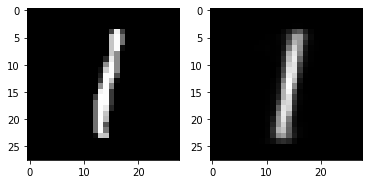

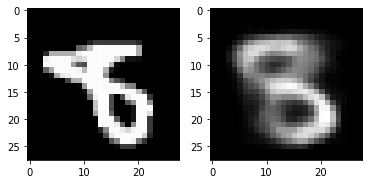

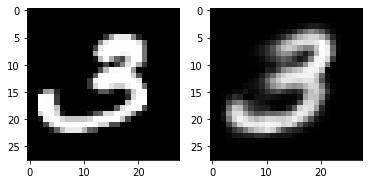

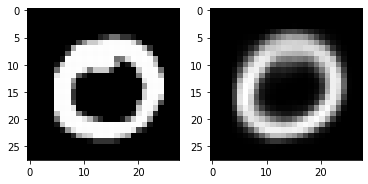

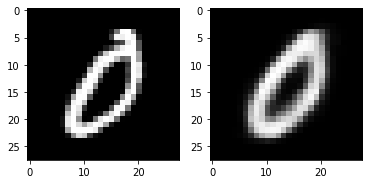

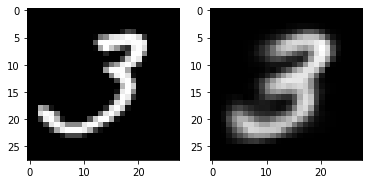

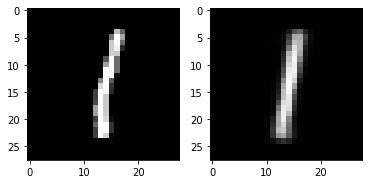

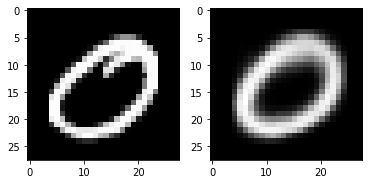

In [9]:
out_img = torch.squeeze(output.cpu().data)

for i in range(8):
    plt.subplot(1, 2, 1)
    plt.imshow(torch.squeeze(image[i]).cpu().numpy(), cmap='gray')
    plt.subplot(1, 2, 2)
    plt.imshow(out_img[i].numpy(), cmap='gray')
    plt.show()

### 5. Image generation

In [26]:
# encoder: Bx2
latent_vec = torch.rand(5, 2).to(device)
latent_vec = latent_vec*(-1)
generated_sample = decoder(latent_vec)

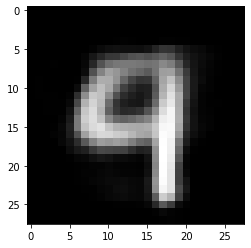

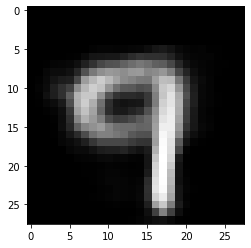

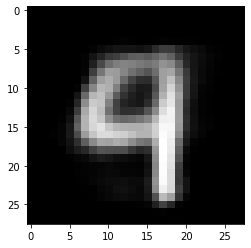

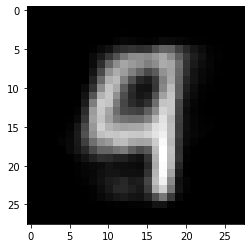

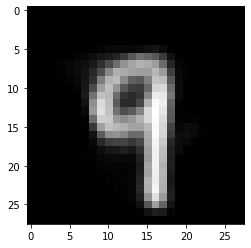

In [27]:
for i in range(5):
    plt.imshow(torch.squeeze(generated_sample)[i].cpu().detach().numpy(), cmap='gray')
    plt.show()